In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime

C:\Users\babyt\miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('./Bangkok 2021-11-16 to 2021-12-16.csv')

In [3]:
df.corr()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
temp,1.000000,0.943219,0.483244,-0.375535,0.037357,0.039307,NaN,NaN,-0.489850,0.171239,0.145746,-0.619561,0.174450,0.238530,0.513926,0.462229,0.502402,NaN
feelslike,0.943219,1.000000,0.660293,-0.149193,0.065837,0.065415,NaN,NaN,-0.327879,0.093413,0.155263,-0.712099,0.210731,0.204345,0.369939,0.322443,0.357006,NaN
dew,0.483244,0.660293,1.000000,0.623594,0.080697,0.105460,NaN,NaN,0.233276,-0.166576,0.150168,-0.710196,0.254562,0.111581,-0.106263,-0.108866,-0.112693,NaN
humidity,-0.375535,-0.149193,0.623594,1.000000,0.049006,0.074135,NaN,NaN,0.542448,-0.329069,0.035764,-0.211329,0.094364,-0.110778,-0.549666,-0.523817,-0.546590,NaN
precip,0.037357,0.065837,0.080697,0.049006,1.000000,0.631426,NaN,NaN,NaN,-0.050753,-0.024648,-0.060864,0.104766,0.047417,0.025796,0.076637,0.019593,NaN
precipprob,0.039307,0.065415,0.105460,0.074135,0.631426,1.000000,NaN,NaN,NaN,-0.080053,-0.044689,-0.063352,0.173515,0.048872,-0.004271,0.016352,-0.012628,NaN
snow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
snowdepth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
windgust,-0.489850,-0.327879,0.233276,0.542448,NaN,NaN,NaN,NaN,1.000000,-0.331261,-0.194255,0.089717,0.102909,-0.169211,-0.223292,-0.329579,-0.153270,NaN
windspeed,0.171239,0.093413,-0.166576,-0.329069,-0.050753,-0.080053,NaN,NaN,-0.331261,1.000000,-0.091292,-0.025563,-0.270159,0.010663,0.235369,0.062414,0.244262,NaN


In [4]:
df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,Bangkok,2021-11-16T00:00:00,27.0,30.1,24.0,83.68,0.0,0,NaN,0,...,1010.0,27.1,10.0,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999"
1,Bangkok,2021-11-16T01:00:00,26.9,30.4,24.8,88.07,0.0,0,NaN,0,...,1009.3,62.3,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"48429099999,48455099999,48453099999,4845609999..."
2,Bangkok,2021-11-16T02:00:00,27.2,30.8,24.5,84.94,0.0,0,NaN,0,...,1008.6,27.1,9.7,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999"
3,Bangkok,2021-11-16T03:00:00,27.2,30.7,24.2,83.67,0.0,0,NaN,0,...,1008.6,27.1,9.7,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999"
4,Bangkok,2021-11-16T04:00:00,26.8,29.6,23.9,84.36,0.0,0,NaN,0,...,1008.6,62.8,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"48429099999,48455099999,48453099999,4845609999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,Bangkok,2021-12-16T19:00:00,29.6,31.8,20.5,57.96,0.0,0,NaN,0,...,1009.8,32.5,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"48429099999,48455099999,48453099999,4845609999..."
740,Bangkok,2021-12-16T20:00:00,29.0,30.8,20.0,58.35,0.0,0,NaN,0,...,1010.6,25.7,10.0,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999"
741,Bangkok,2021-12-16T21:00:00,28.7,30.5,20.0,59.20,0.0,0,NaN,0,...,1011.0,25.7,10.0,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999"
742,Bangkok,2021-12-16T22:00:00,28.4,30.4,20.6,62.51,0.0,0,NaN,0,...,1011.6,33.7,9.8,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"48429099999,48455099999,48453099999,4845609999..."


In [5]:
df['ds'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)

In [6]:
df['cloudcover'] = df['cloudcover']/1000

In [7]:
df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,ds
0,Bangkok,2021-11-16T00:00:00,27.0,30.1,24.0,83.68,0.0,0,NaN,0,...,0.0271,10.0,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999",2021-11-16 00:00:00
1,Bangkok,2021-11-16T01:00:00,26.9,30.4,24.8,88.07,0.0,0,NaN,0,...,0.0623,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"48429099999,48455099999,48453099999,4845609999...",2021-11-16 01:00:00
2,Bangkok,2021-11-16T02:00:00,27.2,30.8,24.5,84.94,0.0,0,NaN,0,...,0.0271,9.7,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999",2021-11-16 02:00:00
3,Bangkok,2021-11-16T03:00:00,27.2,30.7,24.2,83.67,0.0,0,NaN,0,...,0.0271,9.7,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999",2021-11-16 03:00:00
4,Bangkok,2021-11-16T04:00:00,26.8,29.6,23.9,84.36,0.0,0,NaN,0,...,0.0628,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"48429099999,48455099999,48453099999,4845609999...",2021-11-16 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,Bangkok,2021-12-16T19:00:00,29.6,31.8,20.5,57.96,0.0,0,NaN,0,...,0.0325,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"48429099999,48455099999,48453099999,4845609999...",2021-12-16 19:00:00
740,Bangkok,2021-12-16T20:00:00,29.0,30.8,20.0,58.35,0.0,0,NaN,0,...,0.0257,10.0,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999",2021-12-16 20:00:00
741,Bangkok,2021-12-16T21:00:00,28.7,30.5,20.0,59.20,0.0,0,NaN,0,...,0.0257,10.0,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999",2021-12-16 21:00:00
742,Bangkok,2021-12-16T22:00:00,28.4,30.4,20.6,62.51,0.0,0,NaN,0,...,0.0337,9.8,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"48429099999,48455099999,48453099999,4845609999...",2021-12-16 22:00:00


In [8]:
newdf = df[['ds','cloudcover']]

In [9]:
newdf.columns = ['ds', 'y']

In [10]:
newdf

,ds,y
0,2021-11-16 00:00:00,0.0271
1,2021-11-16 01:00:00,0.0623
2,2021-11-16 02:00:00,0.0271
3,2021-11-16 03:00:00,0.0271
4,2021-11-16 04:00:00,0.0628
...,...,...
739,2021-12-16 19:00:00,0.0325
740,2021-12-16 20:00:00,0.0257
741,2021-12-16 21:00:00,0.0257
742,2021-12-16 22:00:00,0.0337


<AxesSubplot:xlabel='ds'>

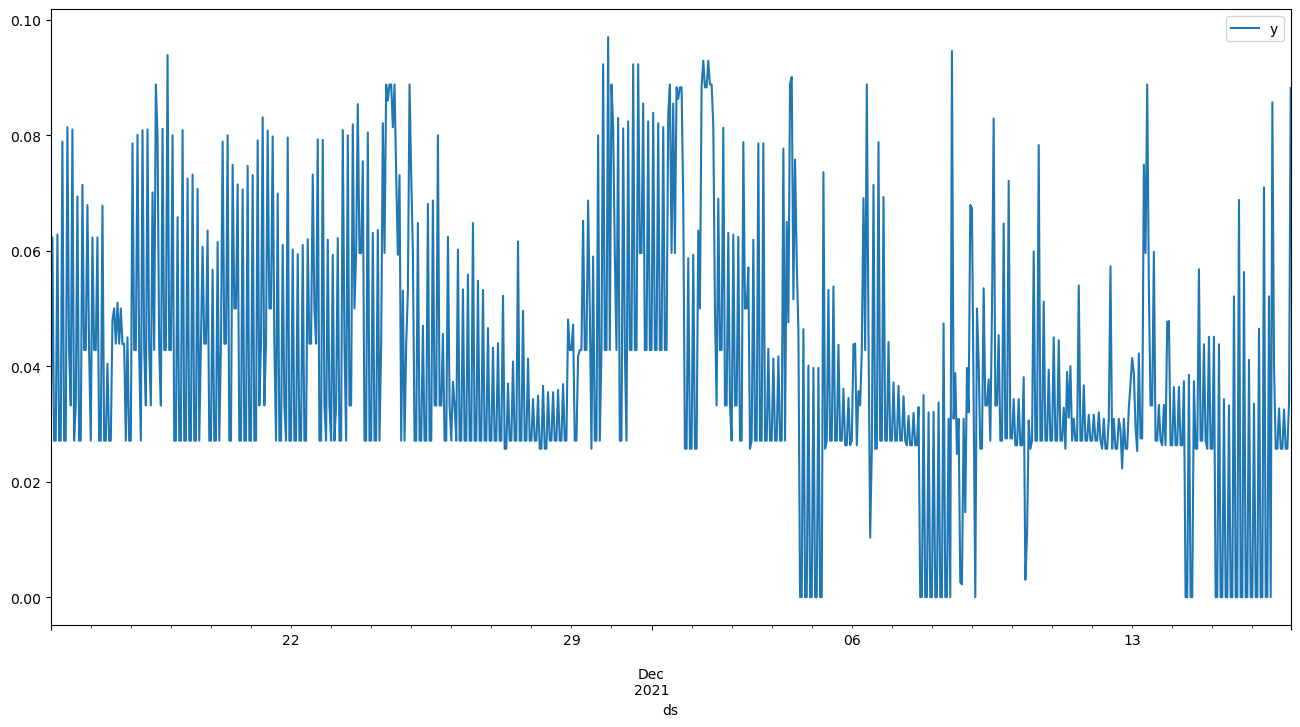

In [11]:
newdf.set_index('ds').plot(figsize=(16,8))

In [12]:
model = Prophet()

In [13]:
model.fit(newdf)

10:44:31 - cmdstanpy - INFO - Chain [1] start processing
10:44:31 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = model.make_future_dataframe(periods=30, freq="H")
future.tail(50)

,ds
724,2021-12-16 04:00:00
725,2021-12-16 05:00:00
726,2021-12-16 06:00:00
727,2021-12-16 07:00:00
728,2021-12-16 08:00:00
729,2021-12-16 09:00:00
730,2021-12-16 10:00:00
731,2021-12-16 11:00:00
732,2021-12-16 12:00:00
733,2021-12-16 13:00:00


In [15]:
forecast = model.predict(future)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-16 00:00:00,0.047868,0.023583,0.077304,0.047868,0.047868,0.002872,0.002872,0.002872,-0.001274,-0.001274,-0.001274,0.004146,0.004146,0.004146,0.0,0.0,0.0,0.050740
1,2021-11-16 01:00:00,0.047858,0.021844,0.074174,0.047858,0.047858,0.000508,0.000508,0.000508,-0.003387,-0.003387,-0.003387,0.003895,0.003895,0.003895,0.0,0.0,0.0,0.048366
2,2021-11-16 02:00:00,0.047848,0.022351,0.070717,0.047848,0.047848,-0.002156,-0.002156,-0.002156,-0.005770,-0.005770,-0.005770,0.003614,0.003614,0.003614,0.0,0.0,0.0,0.045692
3,2021-11-16 03:00:00,0.047838,0.018094,0.069393,0.047838,0.047838,-0.003625,-0.003625,-0.003625,-0.006932,-0.006932,-0.006932,0.003307,0.003307,0.003307,0.0,0.0,0.0,0.044213
4,2021-11-16 04:00:00,0.047828,0.019968,0.070656,0.047828,0.047828,-0.003074,-0.003074,-0.003074,-0.006052,-0.006052,-0.006052,0.002978,0.002978,0.002978,0.0,0.0,0.0,0.044754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,2021-12-18 01:00:00,0.022097,-0.009528,0.039880,0.022070,0.022125,-0.005903,-0.005903,-0.005903,-0.003387,-0.003387,-0.003387,-0.002516,-0.002516,-0.002516,0.0,0.0,0.0,0.016194
770,2021-12-18 02:00:00,0.022042,-0.012100,0.041613,0.022012,0.022072,-0.008337,-0.008337,-0.008337,-0.005770,-0.005770,-0.005770,-0.002567,-0.002567,-0.002567,0.0,0.0,0.0,0.013705
771,2021-12-18 03:00:00,0.021986,-0.013133,0.037620,0.021954,0.022018,-0.009558,-0.009558,-0.009558,-0.006932,-0.006932,-0.006932,-0.002626,-0.002626,-0.002626,0.0,0.0,0.0,0.012428
772,2021-12-18 04:00:00,0.021931,-0.012469,0.038693,0.021895,0.021966,-0.008745,-0.008745,-0.008745,-0.006052,-0.006052,-0.006052,-0.002694,-0.002694,-0.002694,0.0,0.0,0.0,0.013185


In [17]:
dfcst = forecast[['ds','yhat','yhat_lower','yhat_upper']]
dfcst

,ds,yhat,yhat_lower,yhat_upper
0,2021-11-16 00:00:00,0.050740,0.023583,0.077304
1,2021-11-16 01:00:00,0.048366,0.021844,0.074174
2,2021-11-16 02:00:00,0.045692,0.022351,0.070717
3,2021-11-16 03:00:00,0.044213,0.018094,0.069393
4,2021-11-16 04:00:00,0.044754,0.019968,0.070656
...,...,...,...,...
769,2021-12-18 01:00:00,0.016194,-0.009528,0.039880
770,2021-12-18 02:00:00,0.013705,-0.012100,0.041613
771,2021-12-18 03:00:00,0.012428,-0.013133,0.037620
772,2021-12-18 04:00:00,0.013185,-0.012469,0.038693


In [18]:
dt = pd.merge(newdf, dfcst, left_on='ds', right_on='ds')
dt

,ds,y,yhat,yhat_lower,yhat_upper
0,2021-11-16 00:00:00,0.0271,0.050740,0.023583,0.077304
1,2021-11-16 01:00:00,0.0623,0.048366,0.021844,0.074174
2,2021-11-16 02:00:00,0.0271,0.045692,0.022351,0.070717
3,2021-11-16 03:00:00,0.0271,0.044213,0.018094,0.069393
4,2021-11-16 04:00:00,0.0628,0.044754,0.019968,0.070656
...,...,...,...,...,...
739,2021-12-16 19:00:00,0.0325,0.024891,-0.001516,0.049280
740,2021-12-16 20:00:00,0.0257,0.023902,-0.000044,0.049985
741,2021-12-16 21:00:00,0.0257,0.023991,-0.002399,0.048506
742,2021-12-16 22:00:00,0.0337,0.024665,0.000654,0.049449


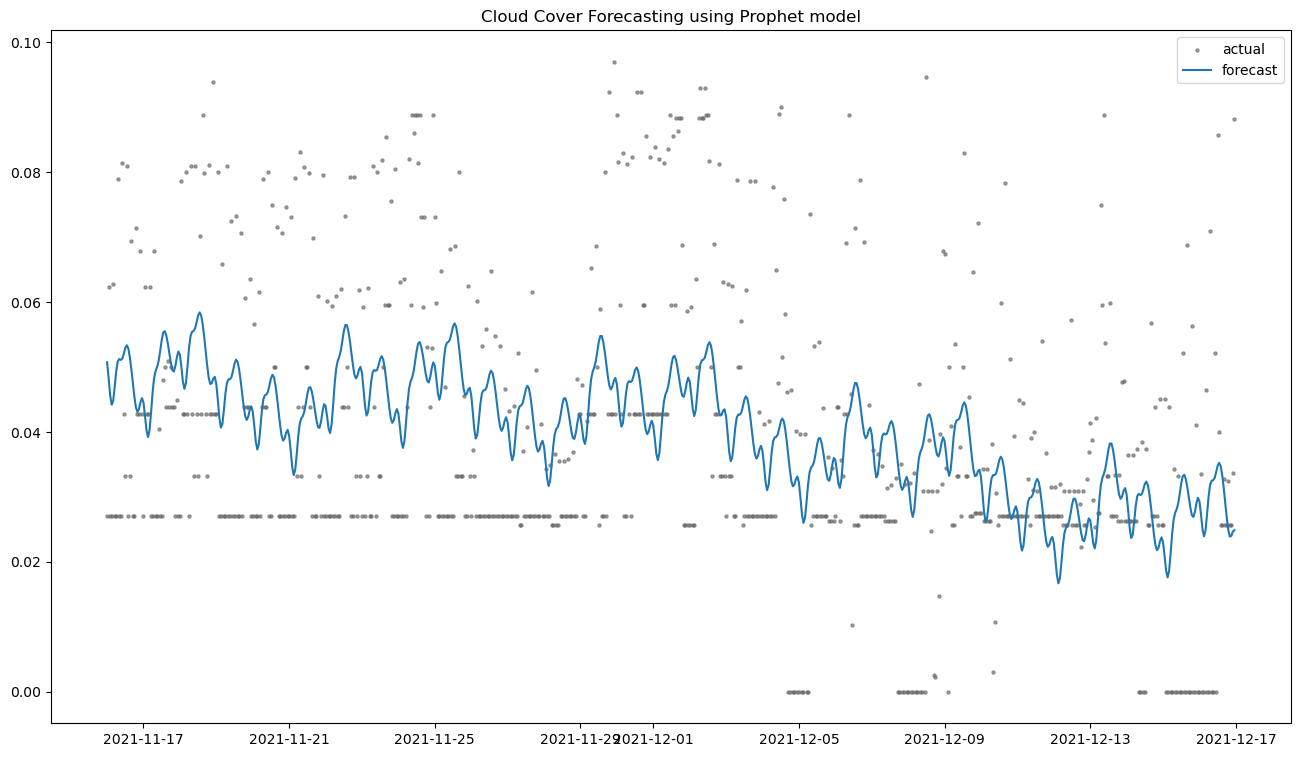

In [19]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt['ds'], dt['yhat'], label='forecast')
plt.title('Cloud Cover Forecasting using Prophet model')
plt.legend()

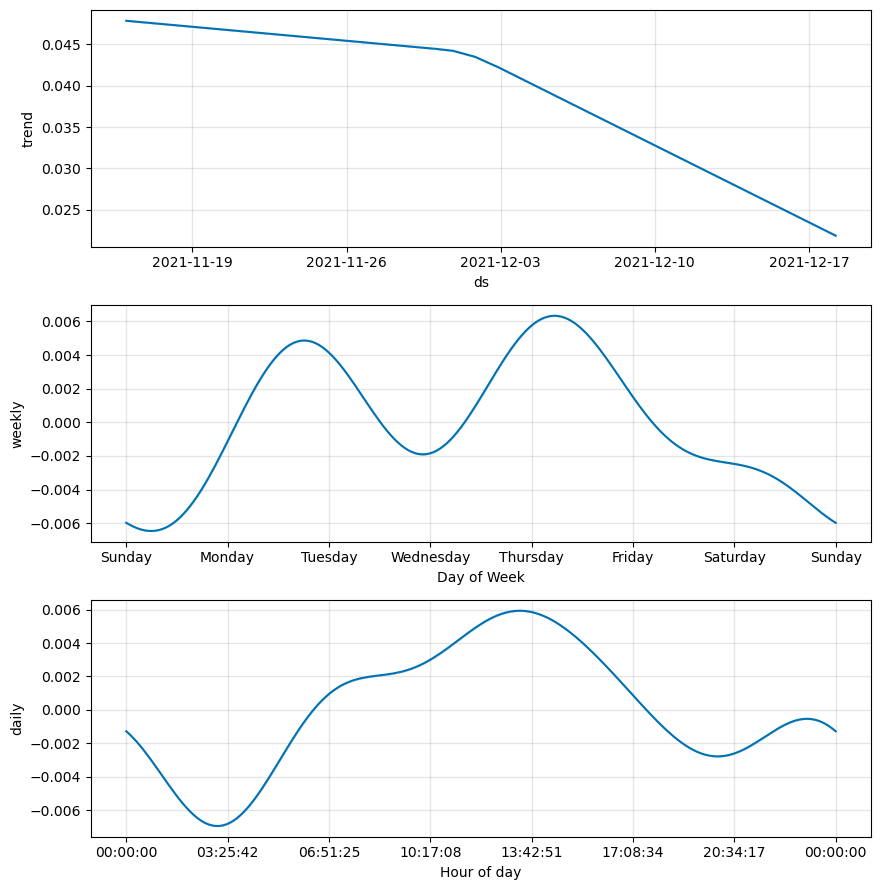

In [20]:
fig = model.plot_components(forecast)

### Analysis

- Trend day: เส้น trend วันยิ่งเยอะยิ่งลดลง
- weekly: จะเป็นได้ว่าระหว่างวันจะมีลักษณะของ seasonality อาทิตย์-ศุกร์เท่านั้น และจะลดลงอย่างต่อเนื่องในช่วงวันเสาร์เย็นไปอาทิตย์ช่วงเช้า
- Dialy (Hour of day): จะเห็นว่าเมฆเริ่มเยอะช่วง ตี 3:25:42 และลดลงหลัง 13:42:51

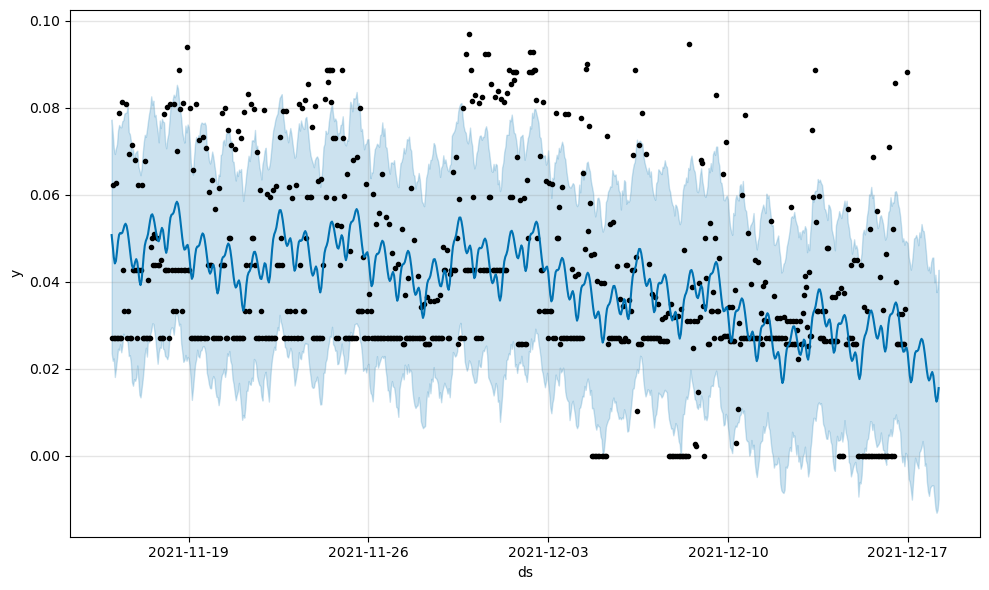

In [21]:
fig1 = model.plot(forecast)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [23]:
prophet_mse_error = mean_squared_error(dt["y"], dt["yhat"], squared=True)
prophet_rmse_error = mean_squared_error(dt["y"], dt["yhat"], squared=False)
prophet_mae_error = mean_absolute_error(dt["y"], dt["yhat"])
prophet_r2 = r2_score(dt["y"], dt["yhat"])

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMAE: {prophet_mae_error}\nr2_score: {prophet_r2}')

MSE Error: 0.00040611604760081005
RMSE Error: 0.020152321146726746
MAE: 0.0162576425344284
r2_score: 0.17444383297506683


### Stationary คือข้อมูลที่มีค่า Mean และ Variance คงที่เมื่อเวลาผ่านไป ดังนั้นข้อมูลทุกประเภทที่มี Trend หรือ Seasonal effect หรือทั้งสองอย่างรวมกัน (Trend + Seasonal) จะไม่ถือว่าเป็น Stationary และยังไม่สามารถนำข้อมูลมาใช้ใน Model ได้ ต้องมีการปรับข้อมูลในเบื้องต้นก่อน

ค่า p-Value ยังมีค่ามากกว่า 0.05 อยู่ดังนั้น ยังใช้ข้อมูลนี้เลยไม่ได้ เพราะว่าข้อมูลยังเป็น Unit-root (Non-stationary) ต้องมีการปรับข้อมูลก่อน ซึ่งโดยส่วนมากแล้วการปรับจะลอง First difference เข้าไปก่อน เผื่อข้อมูลจะ Smooth มากขึ้น แล้วลองทำซ้ำอีกรอบนึง

In [34]:
from statsmodels.tsa.stattools import adfuller

adf_res = adfuller(df['cloudcover'], autolag = 'AIC')
print('p-Values:' + str(adf_res[1]))

p-Values:0.007072675232051884
